# **Setup Steps** - Required
1. Uncomment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to uncomment the whole cell)
2. Run the first code cell to uninstall the conflicting packages.
3. Run the second code cell to install the package dependencies. This might take several minutes.
4. Restart the notebook runtime before continuing. To do so, open the `Runtime` menu and click `Restart runtime` in the drop-down menu as shown in the image below. Once the notebook kernel restarts do not run the first two code cells again.
![google-colab-restart-notebook-runtime](https://github.com/cj-mills/christianjmills/raw/master/images/icevision-openvino-unity-tutorial/part-1/google-colab-restart-notebook-runtime.png)
5. Re-comment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to comment the whole cell).
6. Execute the notebook starting from the `from icevision.all import *` cell.
7. You will know everything is working if the `from icevision.all import *` cell has the following output.
```text
INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31
```

**Uninstall conflicting packages**

In [1]:
# %%capture 
# !pip uninstall tensorflow -y
# !pip uninstall thinc -y
# !pip uninstall fastai -y
# !pip uninstall fastcore -y
# !pip uninstall spacy -y
# !pip uninstall en-core-web-sm -y
# !pip uninstall torchtext -y

**Install Dependencies**

In [2]:
# %%capture
# !pip install -U torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# !pip install mmdet==2.17.0
# !pip install icevision==0.11.0
# !pip install icedata==0.5.1
# !pip install -U setuptools==59.5.0
# !pip install -U pillow
# !pip install -U numpy

# **Required:** Restart the notebook after installing dependencies and do not rerun the above code cells

**Import IceVision library**

In [3]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [4]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Clone GitHub repository**

In [5]:
!git clone https://github.com/MbassiJaphet/pytorch-for-information-extraction.git

Cloning into 'pytorch-for-information-extraction'...
remote: Enumerating objects: 1170, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1170 (delta 6), reused 5 (delta 5), pack-reused 1150
Receiving objects: 100% (1170/1170), 39.14 MiB | 43.38 MiB/s, done.
Resolving deltas: 100% (556/556), done.


In [6]:
!ls ./pytorch-for-information-extraction/code/datasets/detection

classes.json  student-id  test.json  train.json  valid.json


**Define path to dataset**

In [7]:
data_dir = Path('./pytorch-for-information-extraction/code/datasets/detection/student-id')
data_dir

Path('pytorch-for-information-extraction/code/datasets/detection/student-id')

In [8]:
dataset_name = data_dir.name
dataset_name

'student-id'

In [9]:
img_dir = data_dir

**Get image file paths**

In [10]:
files = get_image_files(img_dir)
len(files)

150

**Inspect files**

In [11]:
pd.DataFrame([files[0], files[-1]])

0
0  pytorch-for-information-extraction/code/datasets/detection/student-id/10001.jpg
1  pytorch-for-information-extraction/code/datasets/detection/student-id/10150.jpg

**Inspect one of the training images**

Image Dims: (640, 480)


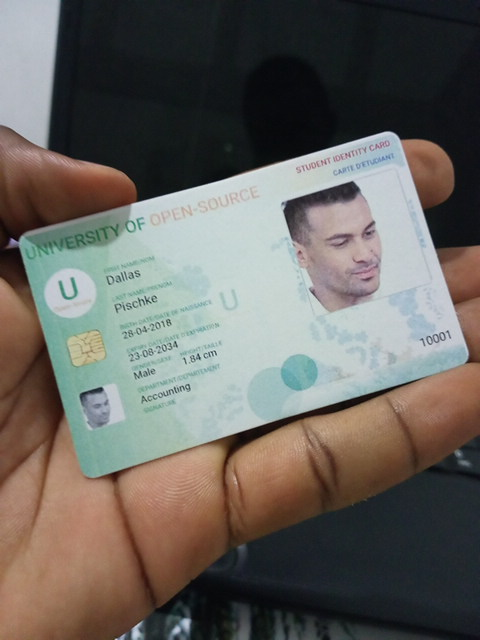

In [12]:
import PIL
img = PIL.Image.open(files[0]).convert('RGB')
print(f"Image Dims: {img.shape}")
img

**Create a dictionary that maps image names to file paths**

In [13]:
img_dict = {file.name.split('.')[0] : file for file in files}
pd.DataFrame(list(img_dict.items())[0]).transpose()

0  \
0  10001   

                                                                                 1  
0  pytorch-for-information-extraction/code/datasets/detection/student-id/10001.jpg

**Get list of annotation file paths**

In [14]:
import os
from glob import glob

In [15]:
annotation_paths = glob(os.path.join(data_dir, "*.json"))
pd.DataFrame(annotation_paths).head()

0
0  pytorch-for-information-extraction/code/datasets/detection/student-id/10092.json
1  pytorch-for-information-extraction/code/datasets/detection/student-id/10149.json
2  pytorch-for-information-extraction/code/datasets/detection/student-id/10044.json
3  pytorch-for-information-extraction/code/datasets/detection/student-id/10080.json
4  pytorch-for-information-extraction/code/datasets/detection/student-id/10095.json

**Create annotation dataframe**

In [16]:
cls_dataframes = (pd.read_json(f, orient='index').transpose() for f in annotation_paths)
annotation_df = pd.concat(cls_dataframes, ignore_index=False)
annotation_df['index'] = annotation_df.apply(lambda row: row['imagePath'].split('.')[0], axis=1)
annotation_df = annotation_df.set_index('index')
annotation_df = annotation_df.loc[list(img_dict.keys())]
annotation_df.head()

version flags  \
index                 
10001  3.21.1    {}   
10002  3.21.1    {}   
10003  3.21.1    {}   
10004  3.21.1    {}   
10005  3.21.1    {}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             shapes  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
10001                                                                                                [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[19.190476190476204, 244.76190476190476], [23.0, 233.33333333333331], [385.8571428571428, 132.38095238095238], [400.1428571428571, 135.23809523809524], [468.71428571428567, 353.3333333333333], [466.80952380952374, 362.85714285714283], [97.28571428571428, 478.0952380952381], [81.09523809523807, 474.2857142857143]], 'shape_type': 'polygon', 'flags': {}}]   
10002  [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[21.095238095238102, 183.33333333333334], [231.41269841269843, 88.09523809523809], [450.46031746031747, 347.6190476190476], [475.06349206349205, 376.1904761904762], [478.2380952380952, 388.8888888888889], [301.25396825396825, 532.5396825396825], [271.0952380952381, 556.3492063492064], [255.22222222222223, 541.2698412698413], [242.52380952380952, 534.9206349206349], [25.85714285714286, 199.20634920634922]], 'shape_type': 'polygon', 'flags': {}}]   
10003                                                                                                                               [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[138.23809523809524, 71.42857142857143], [407.7619047619047, 31.428571428571427], [418.2380952380952, 39.047619047619044], [422.04761904761904, 539.047619047619], [407.7619047619047, 552.3809523809524], [112.52380952380952, 519.047619047619], [98.23809523809524, 505.71428571428567]], 'shape_type': 'polygon', 'flags': {}}]   
10004  [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[119.20529801324503, 218.54304635761588], [440.3973509933775, 184.7682119205298], [445.0331125827814, 190.72847682119206], [391.3907284768212, 366.2251655629139], [384.7682119205298, 372.18543046357615], [250.33112582781456, 401.3245033112583], [82.11920529801324, 446.3576158940397], [76.82119205298014, 441.72185430463577], [49.66887417218544, 239.73509933774835], [107.28476821192052, 228.47682119205297]], 'shape_type': 'polygon', 'flags': {}}]   
10005   [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[41.18840579710144, 218.8405797101449], [41.18840579710144, 209.42028985507244], [52.78260869565216, 201.44927536231882], [224.52173913043475, 142.75362318840578], [359.30434782608694, 89.85507246376811], [367.99999999999994, 92.02898550724638], [462.2028985507246, 275.3623188405797], [369.4492753623188, 348.5507246376811], [199.88405797101444, 472.463768115942], [191.91304347826082, 471.01449275362313]], 'shape_type': 'polygon', 'flags': {}}]   

              lineColor         fillColor  imagePath imageData imageHeight  \
index               

In [17]:
file_id = files[56].name.split('.')[0]
file_id

'10057'

In [18]:
annotation_df.loc[file_id].to_frame()

10057
version                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 3.21.1
flags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       {}
shapes       [{'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[4.703296703296701, 186.8131868131868], [172.28571428571428, 91.20879120879121], [177.23076923076923, 89.56043956043956], [183.82417582417582, 92.85714285714285], [260.19780219780216, 161.53846153846152], [248.65934065934067, 173.07692307692307], [99.75824175824175, 273.6263736263736], [88.2197802197802, 280.7692307692308], [83.27472527472527, 280.7692307692308], [35.472527472527474, 225.82417582417582]], 'shape_type': 'polygon', 'flags': {}}, {'label': 'student_id', 'line_color': None, 'fill_color': None, 'points': [[245.36263736263737, 134.06593406593407], [346.46153846153845, 100.0], [352.5054945054945, 101.64835164835165], [465.1428571428571, 248.9010989010989], [461.8461538461538, 252.1978021978022], [356.35164835164835, 300.5494505494505], [350.3076923076

**Download font file**

In [19]:
font_file = 'KFOlCnqEu92Fr1MmEU9vAw.ttf'
if not os.path.exists(font_file): 
    !wget https://fonts.gstatic.com/s/roboto/v30/$font_file

--2022-09-29 18:42:22--  https://fonts.gstatic.com/s/roboto/v30/KFOlCnqEu92Fr1MmEU9vAw.ttf
Resolving fonts.gstatic.com (fonts.gstatic.com)... 142.251.111.94, 2607:f8b0:4004:c17::5e
Connecting to fonts.gstatic.com (fonts.gstatic.com)|142.251.111.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129768 (127K) [font/ttf]
Saving to: ‘KFOlCnqEu92Fr1MmEU9vAw.ttf’

KFOlCnqEu92Fr1MmEU9 100%[===================>] 126.73K  --.-KB/s    in 0.03s   

2022-09-29 18:42:22 (4.90 MB/s) - ‘KFOlCnqEu92Fr1MmEU9vAw.ttf’ saved [129768/129768]



**Annotate sample image**

In [20]:
from PIL import ImageDraw

(480, 640)


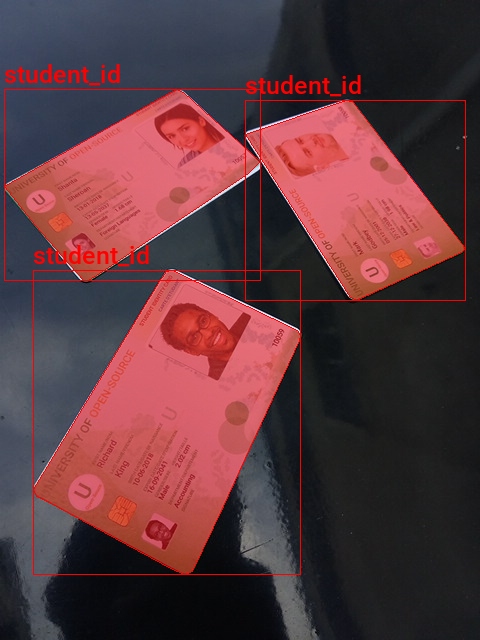

In [21]:
img = PIL.Image.open(img_dict[file_id]).convert('RGB')
width, height = img.size
annotated_img = img.copy()
mask_img = PIL.Image.new('L', img.size, 0)
draw = ImageDraw.Draw(annotated_img)
fnt_size = 25
annotation = annotation_df.loc[file_id]

# Iterate through annotations for sample image
for i in range(len(annotation['shapes'])):
    
    # Extract mask polygon coords
    points = np.array(annotation['shapes'][i]['points'])
    
    # Extract bounding box coords
    x_min, y_min = points.min(axis=0)
    x_max, y_max = points.max(axis=0)
    
    # Draw bounding box on sample image
    shape = (x_min, y_min, x_max, y_max)
    draw.rectangle(shape, outline='red')

    # Draw segmentation mask on sample image
    xy = [(p[0],p[1]) for p in points]
    ImageDraw.Draw(annotated_img, 'RGBA').polygon(xy, fill=(255, 0, 0, 125), outline ="red")
    
    # Draw segmentation mask on blank image
    ImageDraw.Draw(mask_img, 'L').polygon(xy, fill=(255))
    
    # Draw object label on sample image
    fnt = PIL.ImageFont.truetype(font_file, fnt_size)
    label = annotation['shapes'][i]['label']
    draw.multiline_text((x_min, y_min-fnt_size-5), f"{label}", font=fnt, fill='red')
    
print(annotated_img.size) 
annotated_img

**Display segmentation mask**

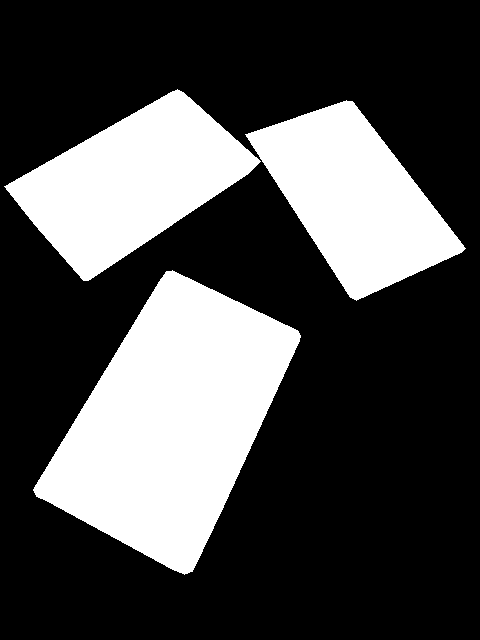

In [22]:
mask_img

**Create a class map**

In [23]:
shapes_df = annotation_df['shapes'].explode().to_frame().shapes.apply(pd.Series)
shapes_df.head()

label line_color fill_color  \
index                                     
10001  student_id       None       None   
10002  student_id       None       None   
10003  student_id       None       None   
10004  student_id       None       None   
10005  student_id       None       None   

                                                                                                                                                                                                                                                                                                                                                                                                                          points  \
index                                                                                                                                                                                                                                                                                                                                                                                                                              
10001                                                                                                [[19.190476190476204, 244.76190476190476], [23.0, 233.33333333333331], [385.8571428571428, 132.38095238095238], [400.1428571428571, 135.23809523809524], [468.71428571428567, 353.3333333333333], [466.80952380952374, 362.85714285714283], [97.28571428571428, 478.0952380952381], [81.09523809523807, 474.2857142857143]]   
10002  [[21.095238095238102, 183.33333333333334], [231.41269841269843, 88.09523809523809], [450.46031746031747, 347.6190476190476], [475.06349206349205, 376.1904761904762], [478.2380952380952, 388.8888888888889], [301.25396825396825, 532.5396825396825], [271.0952380952381, 556.3492063492064], [255.22222222222223, 541.2698412698413], [242.52380952380952, 534.9206349206349], [25.85714285714286, 199.20634920634922]]   
10003                                                                                                                               [[138.23809523809524, 71.42857142857143], [407.7619047619047, 31.428571428571427], [418.2380952380952, 39.047619047619044], [422.04761904761904, 539.047619047619], [407.7619047619047, 552.3809523809524], [112.52380952380952, 519.047619047619], [98.23809523809524, 505.71428571428567]]   
10004  [[119.20529801324503, 218.54304635761588], [440.3973509933775, 184.7682119205298], [445.0331125827814, 190.72847682119206], [391.3907284768212, 366.2251655629139], [384.7682119205298, 372.18543046357615], [250.33112582781456, 401.3245033112583], [82.11920529801324, 446.3576158940397], [76.82119205298014, 441.72185430463577], [49.66887417218544, 239.73509933774835], [107.28476821192052, 228.47682119205297]]   
10005   [[41.18840579710144, 218.8405797101449], [41.18840579710144, 209.42028985507244], [52.78260869565216, 201.44927536231882], [224.52173913043475, 142.75362318840578], [359.30434782608694, 89.85507246376811], [367.99999999999994, 92.02898550724638], [462.2028985507246, 275.3623188405797], [369.4492753623188, 348.5507246376811], [199.88405797101444, 472.463768115942], [191.91304347826082, 471.01449275362313]]   

      shape_type flags  
index                   
10001    polygon    {}  
10002    polygon    {}  
10003    polygon    {}  
10004    polygon    {}  
10005    polygon    {}

In [24]:
labels = shapes_df['label'].unique().tolist()
labels

['student_id']

In [25]:
class_map = ClassMap(labels)
class_map

<ClassMap: {'background': 0, 'student_id': 1}>

**View template for an instance segmentation record**

In [26]:
template_record = InstanceSegmentationRecord()
template_record

BaseRecord

common: 
	- Image size None
	- Filepath: None
	- Img: None
	- Record ID: None
detection: 
	- masks: []
	- mask_array: None
	- Class Map: None
	- Labels: []
	- BBoxes: []

**View template for an instance segmentation parser**

In [27]:
Parser.generate_template(template_record)

class MyParser(Parser):
    def __init__(self, template_record):
        super().__init__(template_record=template_record)
    def __iter__(self) -> Any:
    def __len__(self) -> int:
    def record_id(self, o: Any) -> Hashable:
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        record.set_img_size(<ImgSize>)
        record.set_filepath(<Union[str, Path]>)
        record.detection.add_masks(<Sequence[Mask]>)
        record.detection.set_class_map(<ClassMap>)
        record.detection.add_labels(<Sequence[Hashable]>)
        record.detection.add_bboxes(<Sequence[BBox]>)


**Define custom parser class**

In [28]:
class StudentIDParser(Parser):
    def __init__(self, template_record, annotations_df, img_dict, class_map):
        super().__init__(template_record=template_record)
        self.img_dict = img_dict
        self.df = annotations_df
        self.class_map = class_map

    def __iter__(self):
        for o in self.df.itertuples(): yield o

    def __len__(self):
        return len(self.df)

    def record_id(self, o: Any) -> Hashable:
        return o.Index

    def image_width_height(self, o) -> Tuple[int, int]:
        return self._size[:2]

    def parse_fields(self, o, record, is_new):
        
        filepath = self.img_dict[o.Index]
        
        width, height = PIL.Image.open(filepath).convert('RGB').size
        
        record.set_img_size([width, height])
        record.set_filepath(Path(filepath))
        record.detection.set_class_map(self.class_map)
                
        labels = []
        bbox_list = []
        mask_list = []
        
        for i in range(len(o.shapes)):
            points = np.array(o.shapes[i]['points'])

            x_min, y_min = points.min(axis=0)
            x_max, y_max = points.max(axis=0)
            
            labels.append(o.shapes[i]['label'])
            bbox_list.append(BBox.from_xyxy(x_min, y_min, x_max, y_max))
            
            mask_img = PIL.Image.new('L', (width, height), 0)
            xy = [(p[0],p[1]) for p in points]
            ImageDraw.Draw(mask_img, 'L').polygon(xy, fill=(1))
            mask_array = np.array(mask_img).clip(0,1)
            mask_list.append(MaskArray(mask_array))
        
        record.detection.add_labels(labels)
        record.detection.add_bboxes(bbox_list)
        record.detection.add_masks(mask_list)

**Create a custom parser object**

In [29]:
parser = StudentIDParser(template_record, annotation_df, img_dict, class_map)
len(parser)

150

**Parse annotations to create records**

In [30]:
# Randomly split our data into train/valid
data_splitter = RandomSplitter([0.8, 0.2])

train_records, valid_records = parser.parse(data_splitter)
# train_records, valid_records = parser.parse(data_splitter, cache_filepath=f'{dataset_name}-cache.pkl')

  0%|          | 0/150 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/150 [00:00<?, ?it/s]

**Export class labels**

In [31]:
import json

class_labels = {"classes": parser.class_map.get_classes()}
class_labels_file_name = f"{data_dir.name}-classes.json"

with open(class_labels_file_name, "w") as write_file:
    json.dump(class_labels, write_file)
    
class_labels, class_labels_file_name

({'classes': ['background', 'student_id']}, 'student-id-classes.json')

**Inspect training records**

In [32]:
train_records[0]

BaseRecord

common: 
	- Image size [640, 480]
	- Filepath: pytorch-for-information-extraction/code/datasets/detection/student-id/10150.jpg
	- Img: None
	- Record ID: 10150
detection: 
	- masks: [<icevision.core.mask.MaskArray object at 0x7f8c41990b50>]
	- mask_array: None
	- Class Map: <ClassMap: {'background': 0, 'student_id': 1}>
	- Labels: [1]
	- BBoxes: [<BBox (xmin:15.857142857142847, ymin:35.0, xmax:607.9999999999999, ymax:407.85714285714283)>]

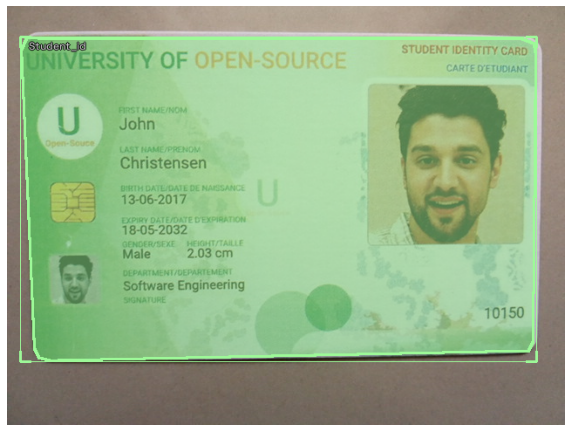

In [33]:
show_record(train_records[0], figsize = (10,10), display_label=True )

In [34]:
show_records(train_records[1:4], ncols=3,display_label=True)

Output hidden; open in https://colab.research.google.com to view.

**Define input resolution**

In [35]:
image_size = 512
presize = 1024

**Define Transforms**

In [36]:
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

**Get normalization stats**

In [37]:
mean = tfms.A.Normalize().mean
std = tfms.A.Normalize().std
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

**Define Datasets**

In [38]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)
train_ds, valid_ds

(<Dataset with 120 items>, <Dataset with 30 items>)

**Apply augmentations to a training sample**

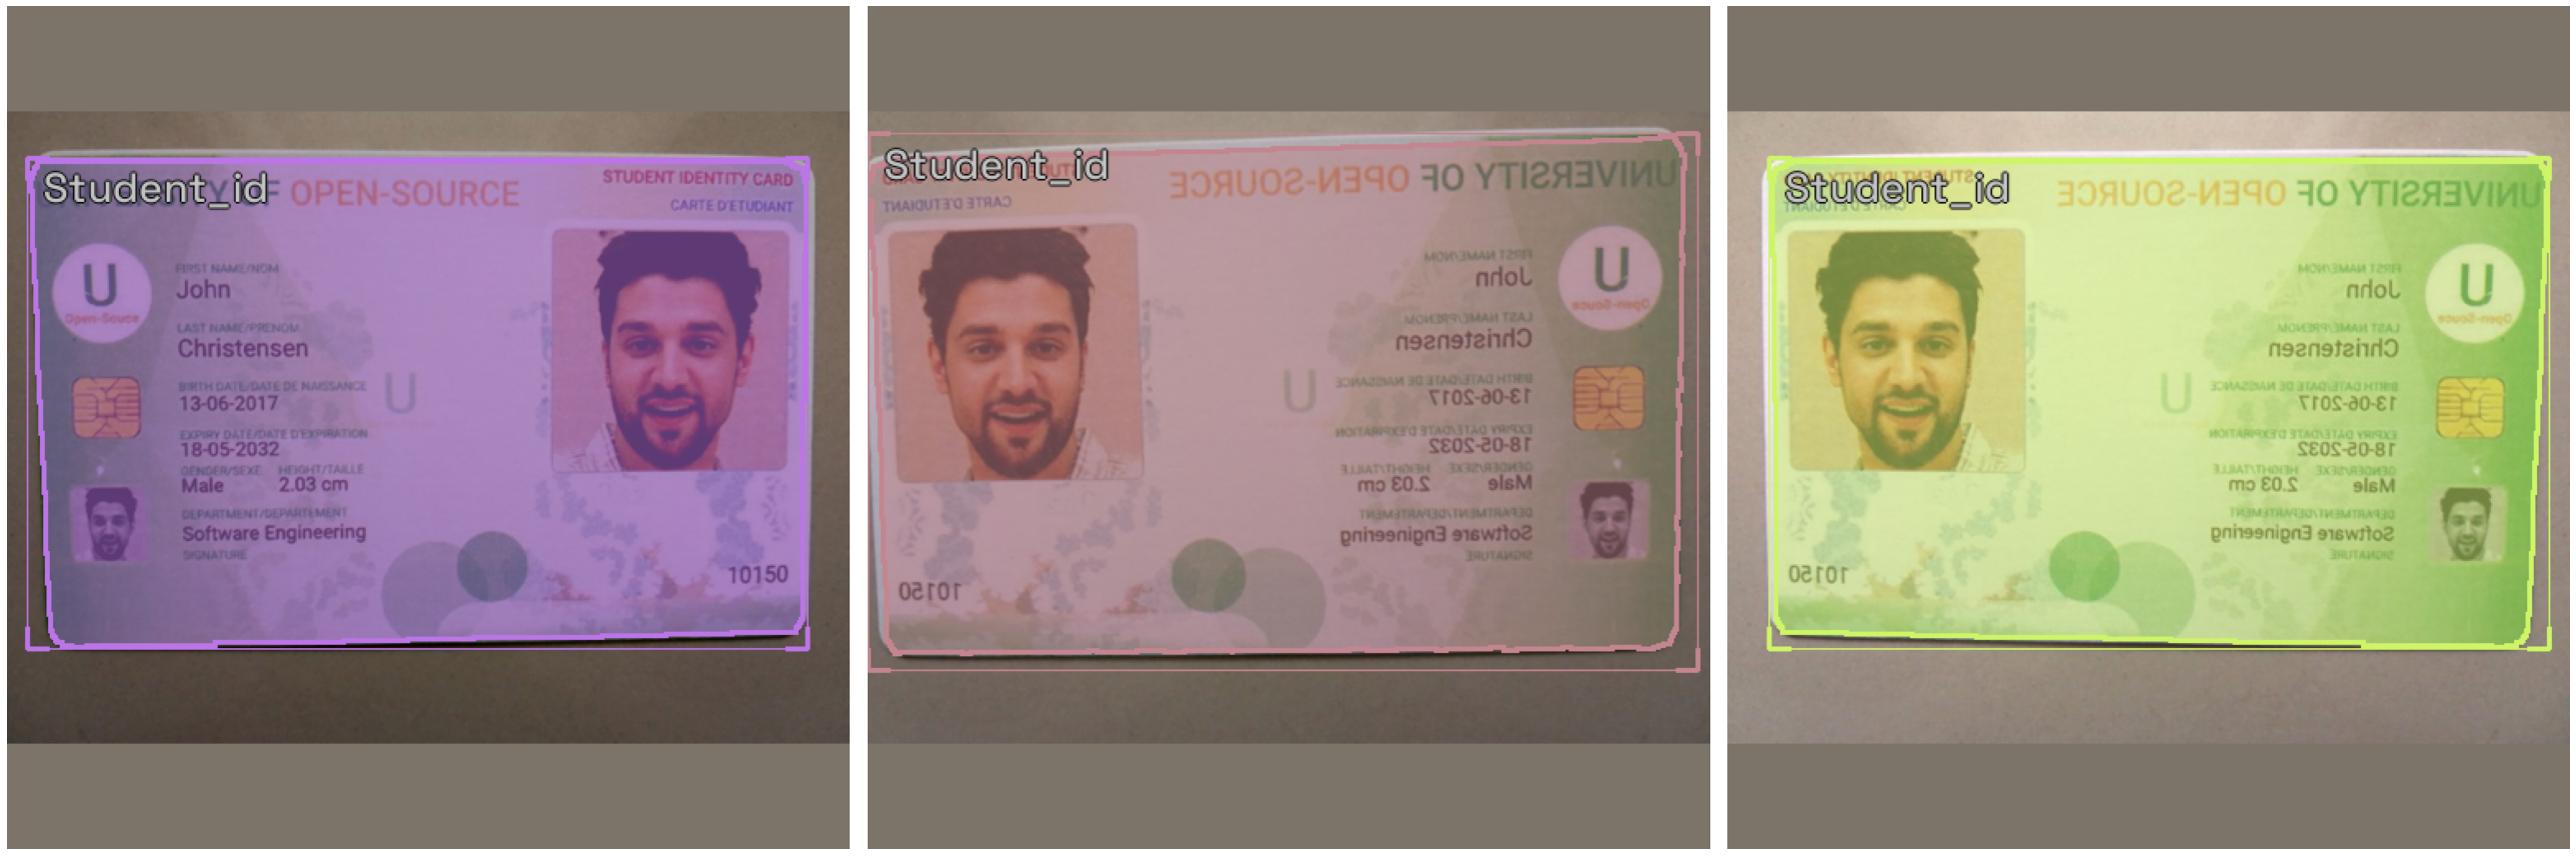

In [39]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

**Define model type**

In [40]:
model_type = models.torchvision.mask_rcnn

**Define backbone**

In [41]:
backbone = model_type.backbones.resnet50_fpn()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

**Define batch size**

In [42]:
bs = 4

**Define DataLoaders**

In [43]:
train_dl = model_type.train_dl(train_ds, batch_size=bs, num_workers=2, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=bs, num_workers=2, shuffle=False)

In [44]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=8, shuffle=False)

In [45]:
valid_batch = first(valid_dl)
infer_batch = first(infer_dl)

In [46]:
(valid_images, valid_labels), valid_records = valid_batch

In [47]:
model_type.show_batch(first(valid_dl), ncols=4)

Output hidden; open in https://colab.research.google.com to view.

**Instantiate the model**

In [48]:
model = model_type.model(backbone=backbone, num_classes=parser.class_map.num_classes) 

**Define metrics**

In [49]:
metrics = [COCOMetric(metric_type=COCOMetricType.mask)]

**Define Learner object**

In [50]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

**Find learning rate**

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


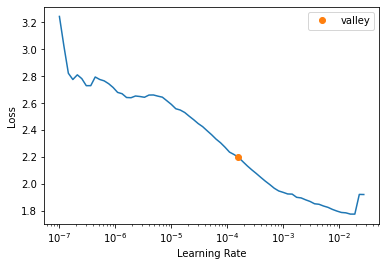

In [51]:
suggested_lrs = learn.lr_find()

**Define learning rate**

In [52]:
lr = suggested_lrs.valley*3
lr

0.00047546795394737273

**Define number of epochs**

In [53]:
epochs = 60

**Finetune model**

In [54]:
learn.fine_tune(epochs, lr, freeze_epochs=1)

**Show results on validation set**

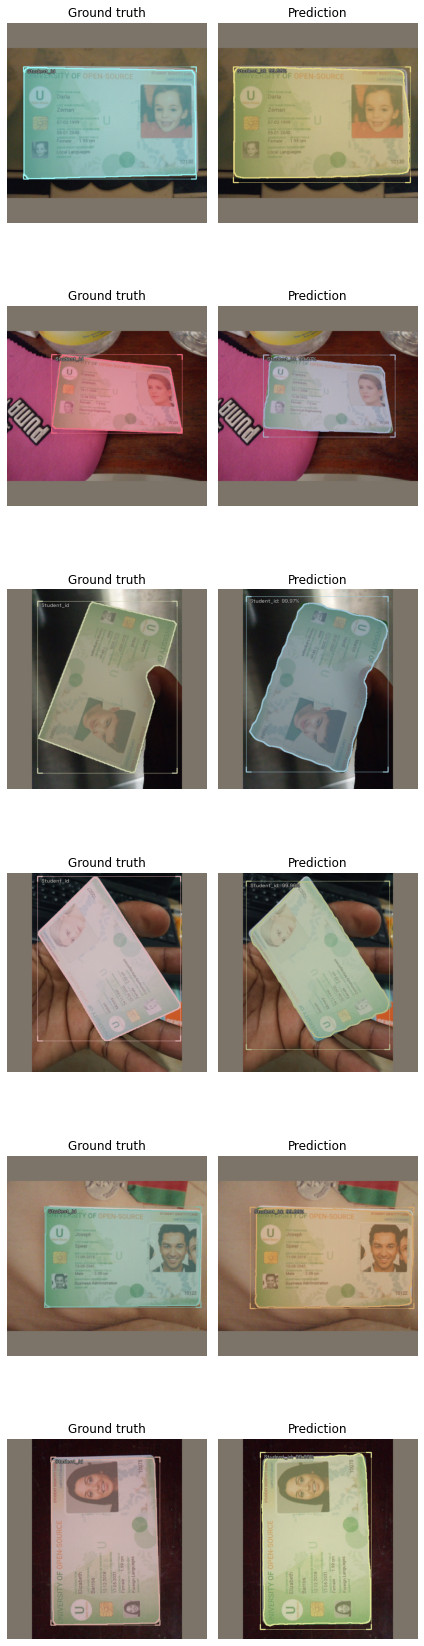

In [55]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

**Define model checkpoint file path**

In [56]:
checkpoint_path = f"{data_dir.name}-{type(model).__name__}.pth"
checkpoint_path

'student-id-MaskRCNN.pth'

**Save model checkpoint**

In [57]:
torch.save(model.state_dict(), checkpoint_path)

**Load class labels**

In [58]:
with open(class_labels_file_name, "r") as read_file:
    classes = json.loads(read_file.read())
classes['classes']

['background', 'student_id']

In [59]:
checkpoint_and_model = models.model_from_checkpoint(checkpoint_path, 
                                                    model_name='torchvision.mask_rcnn', 
                                                    backbone_name='resnet50_fpn',
                                                    img_size=512, 
                                                    classes=classes['classes'],
                                                   )

load checkpoint from local path: student-id-MaskRCNN.pth


**Verify class map**

In [60]:
checkpoint_and_model["class_map"]

<ClassMap: {'background': 0, 'student_id': 1}>

**Get model and device**

In [61]:
model = checkpoint_and_model["model"]

device=next(model.parameters()).device
device

device(type='cpu')

**Define inference preprocessing steps**

In [62]:
img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

**Select a test image**

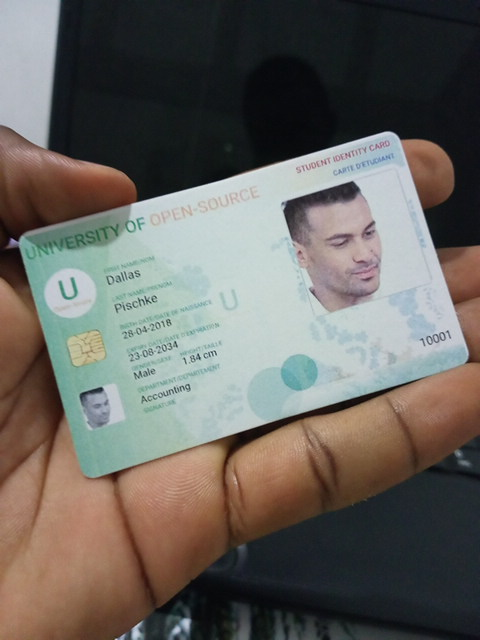

In [63]:
test_img = open_img(files[0])
test_img

**Define inference dataloader**

In [64]:
infer_tfms = tfms.A.Adapter([tfms.A.Normalize()])
infer_ds = Dataset.from_images([test_img], infer_tfms)
infer_dl = model_type.infer_dl(infer_ds, batch_size=1, shuffle=False)

**Perform inference**

In [65]:
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/1 [00:00<?, ?it/s]

**Inspect source image**

In [66]:
preds[0].ground_truth

BaseRecord

common: 
	- Record ID: 0
	- Img: 480x640x3 <np.ndarray> Image
	- Image size ImgSize(width=480, height=640)
detection: 
	- Class Map: None

**Inspect model prediction**

In [67]:
preds[0].pred

BaseRecord

common: 
	- Record ID: 0
	- Img: 480x640x3 <np.ndarray> Image
	- Image size ImgSize(width=480, height=640)
detection: 
	- masks: []
	- mask_array: <icevision.core.mask.MaskArray object at 0x7f8c2c573390>
	- Class Map: None
	- Labels: [1]
	- BBoxes: [<BBox (xmin:11.293807983398438, ymin:127.56524658203125, xmax:464.6934814453125, ymax:493.5615234375)>]
	- Scores: [0.99978656]

**Annotate image with model prediction**

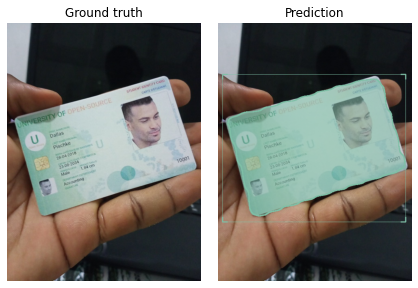

In [68]:
show_preds(preds=preds)